# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import missingno as msno
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [236]:
print("Сиды фиксируются для того, чтобы зафиксировать случайное значение.\
 Таким образом, можно получать одни и те же результаты при перезапуске кода.")

Сиды фиксируются для того, чтобы зафиксировать случайное значение. Таким образом, можно получать одни и те же результаты при перезапуске кода.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [237]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [238]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [239]:
pd.concat([df_test.head(5), df_test.tail(5)], axis=0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [240]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [241]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

В тренировочном датасете есть пропуски в следующий колонках 
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64
В тестовом датасете есть пропуски в следующий колонках 
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


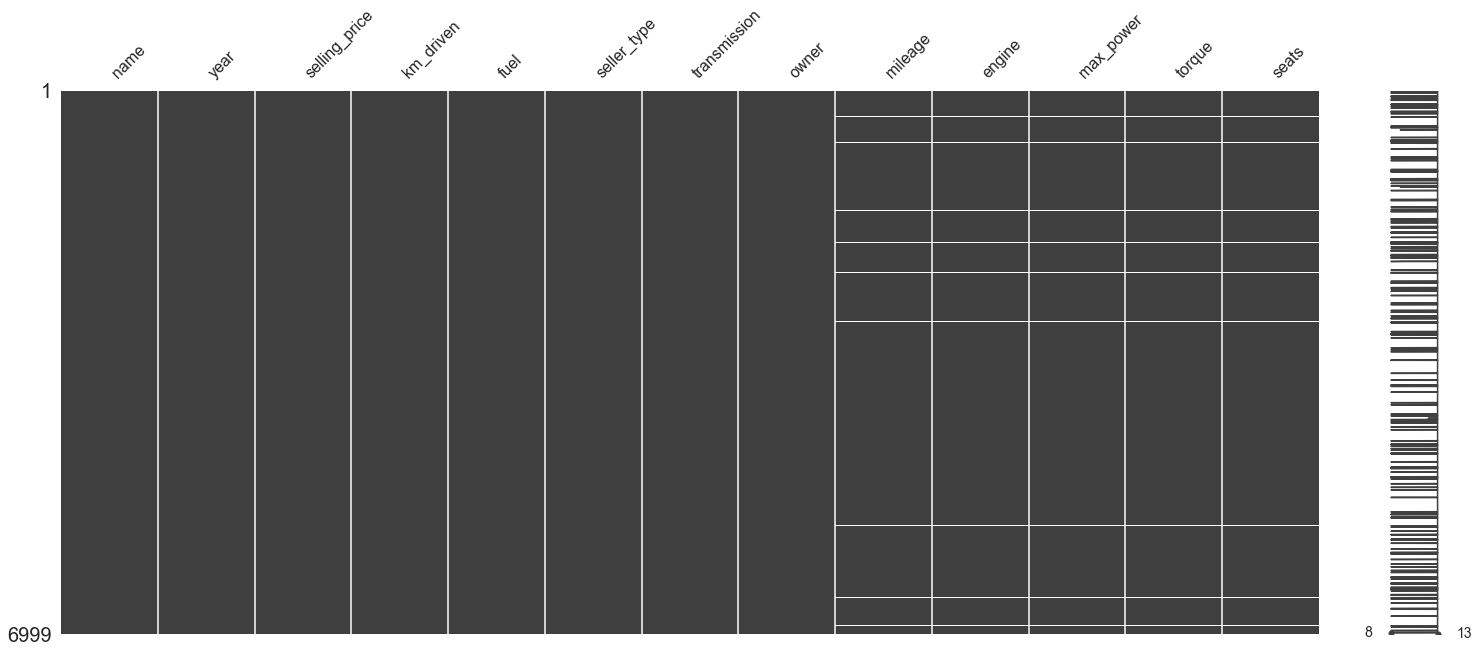

In [242]:
msno.matrix(df_train)
print (f'В тренировочном датасете есть пропуски в следующий колонках \n{df_train.isna().sum()[df_train.isna().sum()>0]}')
print (f'В тестовом датасете есть пропуски в следующий колонках \n{df_test.isna().sum()[df_test.isna().sum()>0]}')

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [243]:
duplicates = df_train.drop(['selling_price'], axis=1).duplicated(keep=False).sum()
print (f'Количество объектов с одинаковым признаковым описанием - {duplicates}')

Количество объектов с одинаковым признаковым описанием - 1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [244]:
df_train[df_train.drop(['selling_price'], axis=1).duplicated(keep=False) == True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [245]:
# Считал это задание как просто оставить первую строку по всем дубликатам, так как по дубликатам,
# где цены совпадают я же также оставлю первую строку, чтобы оставить одно уникальное значение.

duples = df_train[df_train.duplicated(subset = df_train.drop(['selling_price'], axis=1).columns, keep='first') == True]
df_train.drop(duples.index, inplace = True)

In [246]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [247]:
# сбросим индекс
df_train.reset_index(inplace=True, drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [248]:
# напишу функцию для очистки столбцов от гадостей и применю к нужным колонкам

def cleaning(x):
    if pd.isna(x):
        return x
    else:
        cleaned = re.search(r'\d+\.?\d+?', str(x))
        if pd.isna(cleaned):
            return None
        if cleaned is None:
            return None
        else:
            return float(cleaned.group())

In [249]:
# применяю функцию к столбцам в train и test

df_train['mileage'] = df_train['mileage'].apply(lambda x : cleaning(x))
df_train['engine'] = df_train['engine'].apply(lambda x : cleaning(x))
df_train['max_power'] = df_train['max_power'].apply(lambda x : cleaning(x))

df_test['mileage'] = df_train['mileage'].apply(lambda x : cleaning(x))
df_test['engine'] = df_train['engine'].apply(lambda x : cleaning(x))
df_test['max_power'] = df_train['max_power'].apply(lambda x : cleaning(x))

In [250]:
# Теперь напишем функцию для очистки столбца torque. Она немного "ручная" и имеет несколько допущений.
# Но по идее должно работать.


def torque_dp (x):
#     print(x)
    if pd.isna(x):
        return None, None
    
    x = str(x).replace(',', '.').lower()
    values = re.findall(r'\d+\.*\,*\d*',str(x))
    measure = re.findall(r'kgm|KGM|rpm|Nm|RPM|nm|NM',str(x))
    
    if len(values) == 1 & len(measure) == 1:
        if measure[0] == 'kgm':
            fin_value_nm = 9.80655 * float(values[0])
        elif measure[0] == 'nm':
            fin_value_nm = float(values[0])
            fin_value_rpm = None
        elif measure[0] == 'rpm':
            fin_value_rpm = float(values[0])
    
    elif len(values) > len(measure)==1:
            fin_value_nm = values[0]
            fin_value_rpm = values[-1]
    
    elif len(values) == 2 & len(measure) == 2:
        if measure[0] == 'nm':
            fin_value_nm = values[0]
        elif measure[0] == 'kgm':
            fin_value_nm = 9.80655 * float(values[0])
        if measure[1] == 'rpm':
                fin_value_rpm = float(values[1])
    
    elif (len(values) == 3) & (len(measure) == 2):
        if measure[0] == 'nm':
            fin_value_nm = values[0]
        elif measure[0] == 'kgm':
            fin_value_nm = 9.80655 * float(values[0])
        if measure[1] == 'rpm':
                fin_value_rpm = float(values[-1])
    
    elif (len(values) == 2) & (len(measure) == 0):
            fin_value_nm = values[0]
            fin_value_rpm = float(values[-1])
   
    elif (len(values) == 3) & (len(measure) == 0 or len(measure) == 3):
            fin_value_nm = values[0]
            fin_value_rpm = float(values[-1])
    
    else:
        return None, None
        
    return fin_value_nm, fin_value_rpm
    

In [251]:
# применяю функцию для train
df_train['torque_new'] = df_train['torque'].apply(lambda x: torque_dp(x)[0])
df_train['torque_max'] = df_train['torque'].apply(lambda x: torque_dp(x)[1])
df_train['torque_new'] = pd.to_numeric(df_train['torque_new'])
df_train['torque_max'] = pd.to_numeric(df_train['torque_max'])

# применяю функцию для test
df_test['torque_new'] = df_test['torque'].apply(lambda x: torque_dp(x)[0])
df_test['torque_max'] = df_test['torque'].apply(lambda x: torque_dp(x)[1])
df_test['torque_new'] = pd.to_numeric(df_test['torque_new'])
df_test['torque_max'] = pd.to_numeric(df_test['torque_max'])

# удаляю старые столбцы torque и переименовываю новые (сходу не увидел в задании названия, которые нужно дать)
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)
df_train.rename(columns={'torque_new' : 'torque', 'torque_max' : 'max_torque_rpm'}, inplace= True)
df_test.rename(columns={'torque_new' : 'torque', 'torque_max' : 'max_torque_rpm'}, inplace= True)

df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,7.0,260.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.1,1498.0,103.5,5.0,260.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,23.0,1396.0,90.0,5.0,172.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0,200.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,20.1,1197.0,81.8,5.0,96.0,3000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [252]:
# Считаем медианы для тестовой выборки
train_mileage_median = df_train['mileage'].median()
train_engine_median = df_train['engine'].median()
train_maxpower_median = df_train['max_power'].median()
train_seats_median = df_train['seats'].median()
train_torque_new_median = df_train['torque'].median()
train_torque_max_median = df_train['max_torque_rpm'].median()

# Заполняем для train
df_train['mileage'].fillna(train_mileage_median, inplace=True)
df_train['engine'].fillna(train_engine_median, inplace=True)
df_train['max_power'].fillna(train_maxpower_median, inplace=True)
df_train['torque'].fillna(train_torque_new_median, inplace=True)
df_train['max_torque_rpm'].fillna(train_torque_max_median, inplace=True)
df_train['seats'].fillna(train_seats_median, inplace=True)

# Заполняем для теста
df_test['mileage'].fillna(train_mileage_median, inplace=True)
df_test['engine'].fillna(train_engine_median, inplace=True)
df_test['max_power'].fillna(train_maxpower_median, inplace=True)
df_test['torque'].fillna(train_torque_new_median, inplace=True)
df_test['max_torque_rpm'].fillna(train_torque_max_median, inplace=True)
df_test['seats'].fillna(train_seats_median, inplace=True)

df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.409675,1429.448973,87.937534,5.426712,175.357287,2886.176199
std,4.095622,5.354320e+05,6.007114e+04,3.984538,485.662834,31.577799,0.982344,107.144665,1080.732912
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,47.071440,1.800000
25%,2011.000000,2.500000e+05,3.900000e+04,16.900000,1197.000000,68.000000,5.000000,111.800000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.350000,1248.000000,81.800000,5.000000,160.000000,2800.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000,200.053620,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1863.244500,5300.000000


In [253]:
# сохраняю сразу в pickle, потому что версия iterativeimputer, который использовал далее, конфликтует с sklearn 
# в PyCharm. Поэтому для inference далее буду использовать простое заполнение медианой.

with open('filling_na_medians.pkl', 'wb') as file:
    pickle.dump([train_mileage_median, train_engine_median, train_maxpower_median, 
                 train_seats_median, train_torque_new_median, train_torque_max_median], file)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [254]:
df_train['engine'] = pd.to_numeric(df_train['engine'], downcast='integer')
df_train['seats'] = pd.to_numeric(df_train['seats'], downcast='integer')
df_test['engine'] = pd.to_numeric(df_test['engine'], downcast='integer')
df_test['seats'] = pd.to_numeric(df_test['seats'], downcast='integer')

In [255]:
print("Думается, что категориальная будет лучше, поскольку переменная отражает количество мест в машине, \
и стоимость может расти нелинейно при увеличении количества мест. То есть разница между 2 и 3 местами \
может быть небольшая, а между 3 и 4 - более значительная. Поэтому, возможно, будет удобно \
разделить переменную на категории и,также возможно, объединить некоторые.")

Думается, что категориальная будет лучше, поскольку переменная отражает количество мест в машине, и стоимость может расти нелинейно при увеличении количества мест. То есть разница между 2 и 3 местами может быть небольшая, а между 3 и 4 - более значительная. Поэтому, возможно, будет удобно разделить переменную на категории и,также возможно, объединить некоторые.


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

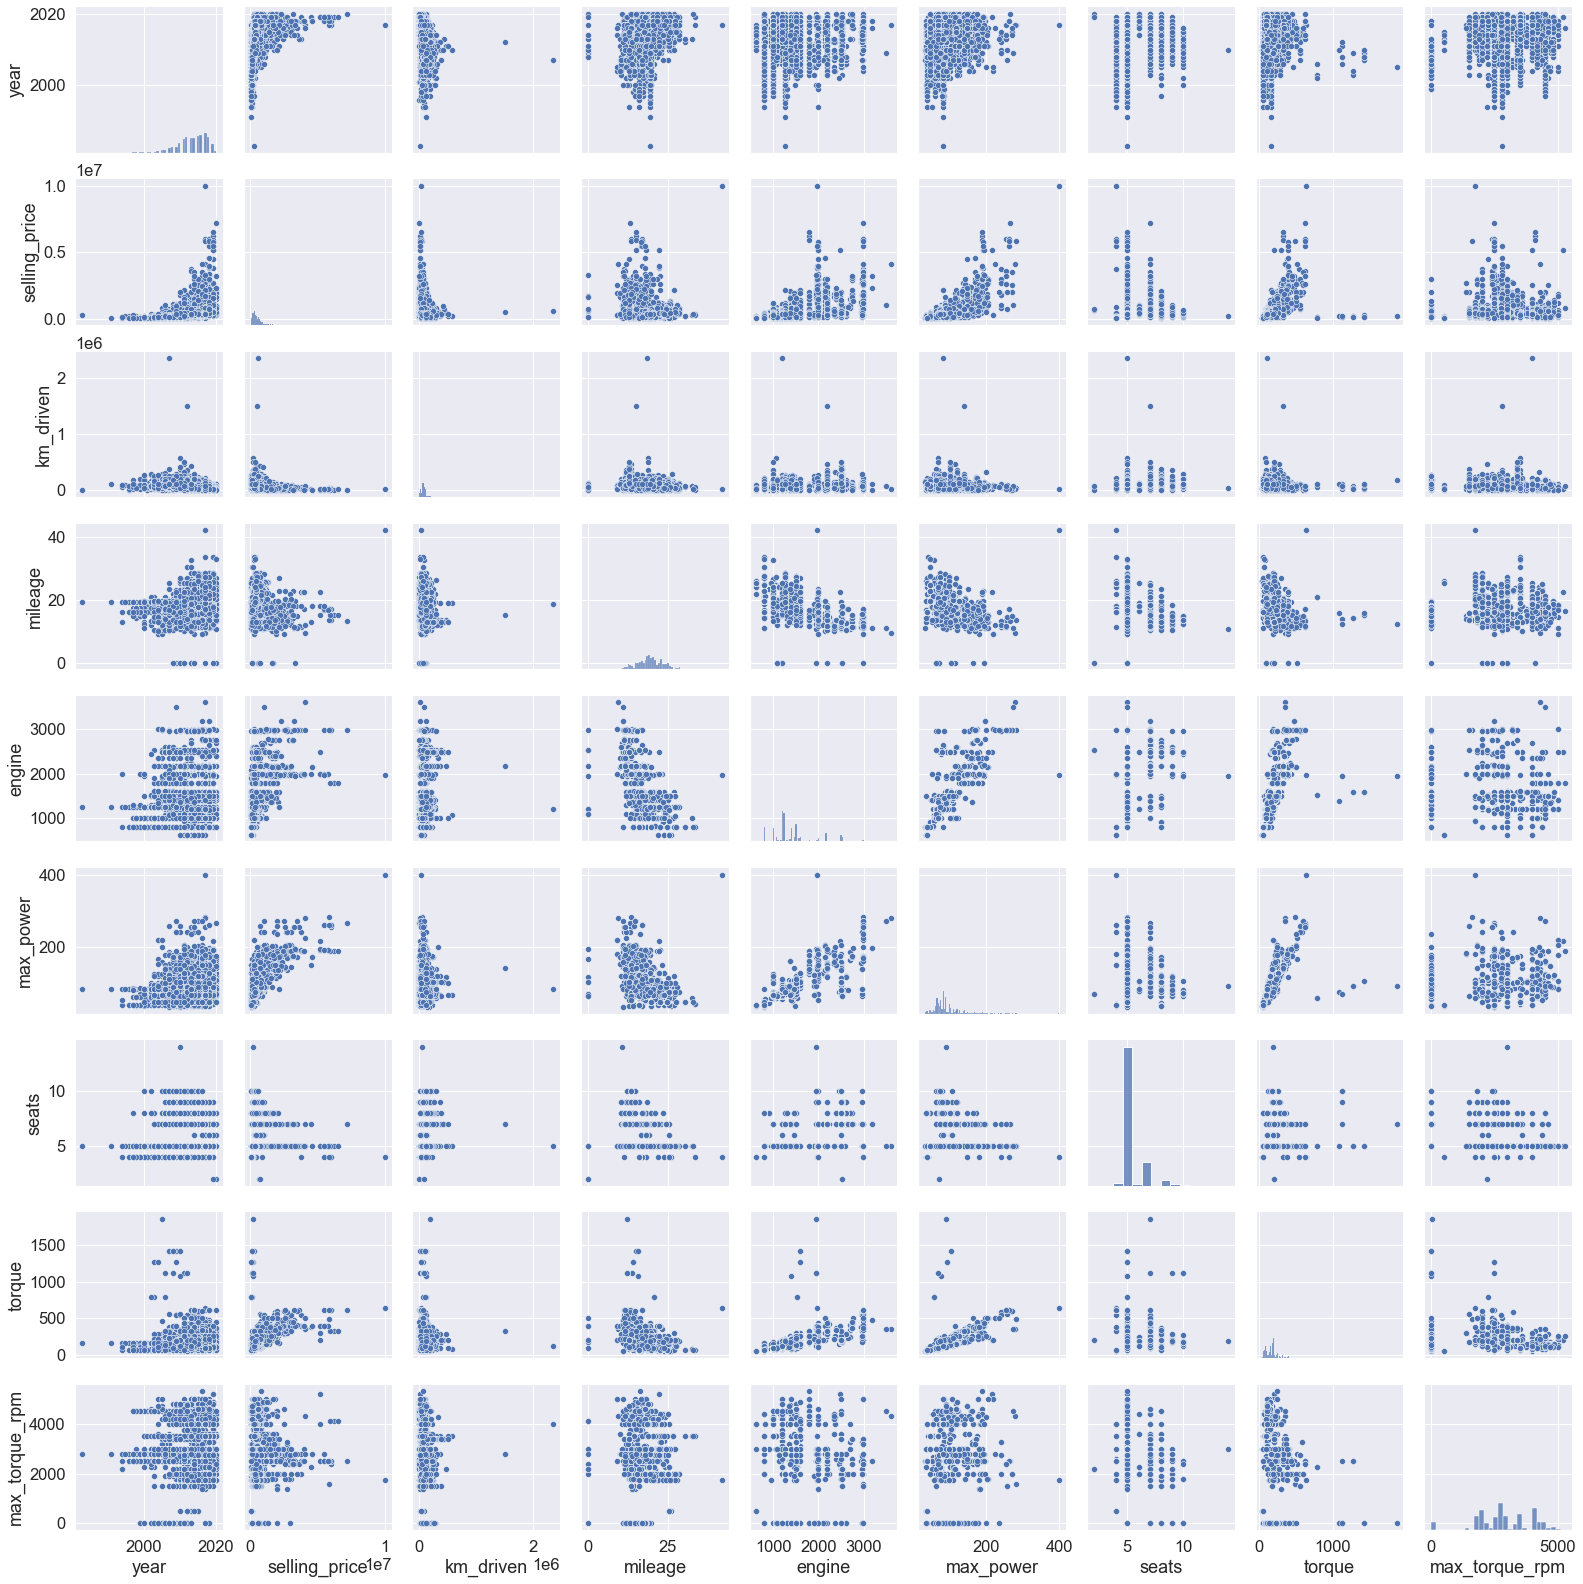

In [256]:
sns.set(font_scale = 1.5)
sns.pairplot(df_train);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной? 
### <font color='Purple'> Заметны связи предикторов и зависимой переменной - визуально связь видна с предикторами: Year, km_driven, engine, max_power, torque, (seats и mileage также прослеживается, но менее явная)

    
* А о корреляциях признаков? </font>
### <font color='Purple'> Видно, что некоторые признаки также скоррелированы друг с другом - например, мощность (max_power), крутящий момент (torque) и engine, в целом, отражают некоторое качество двигателя и сильно взаимосвязаны. Отчасти каждый из этих признаков имеет небольшую взимосвязь с year, что, видимо, как-то отражает постепенное увеличение мощности выпускаемых автомобилей.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

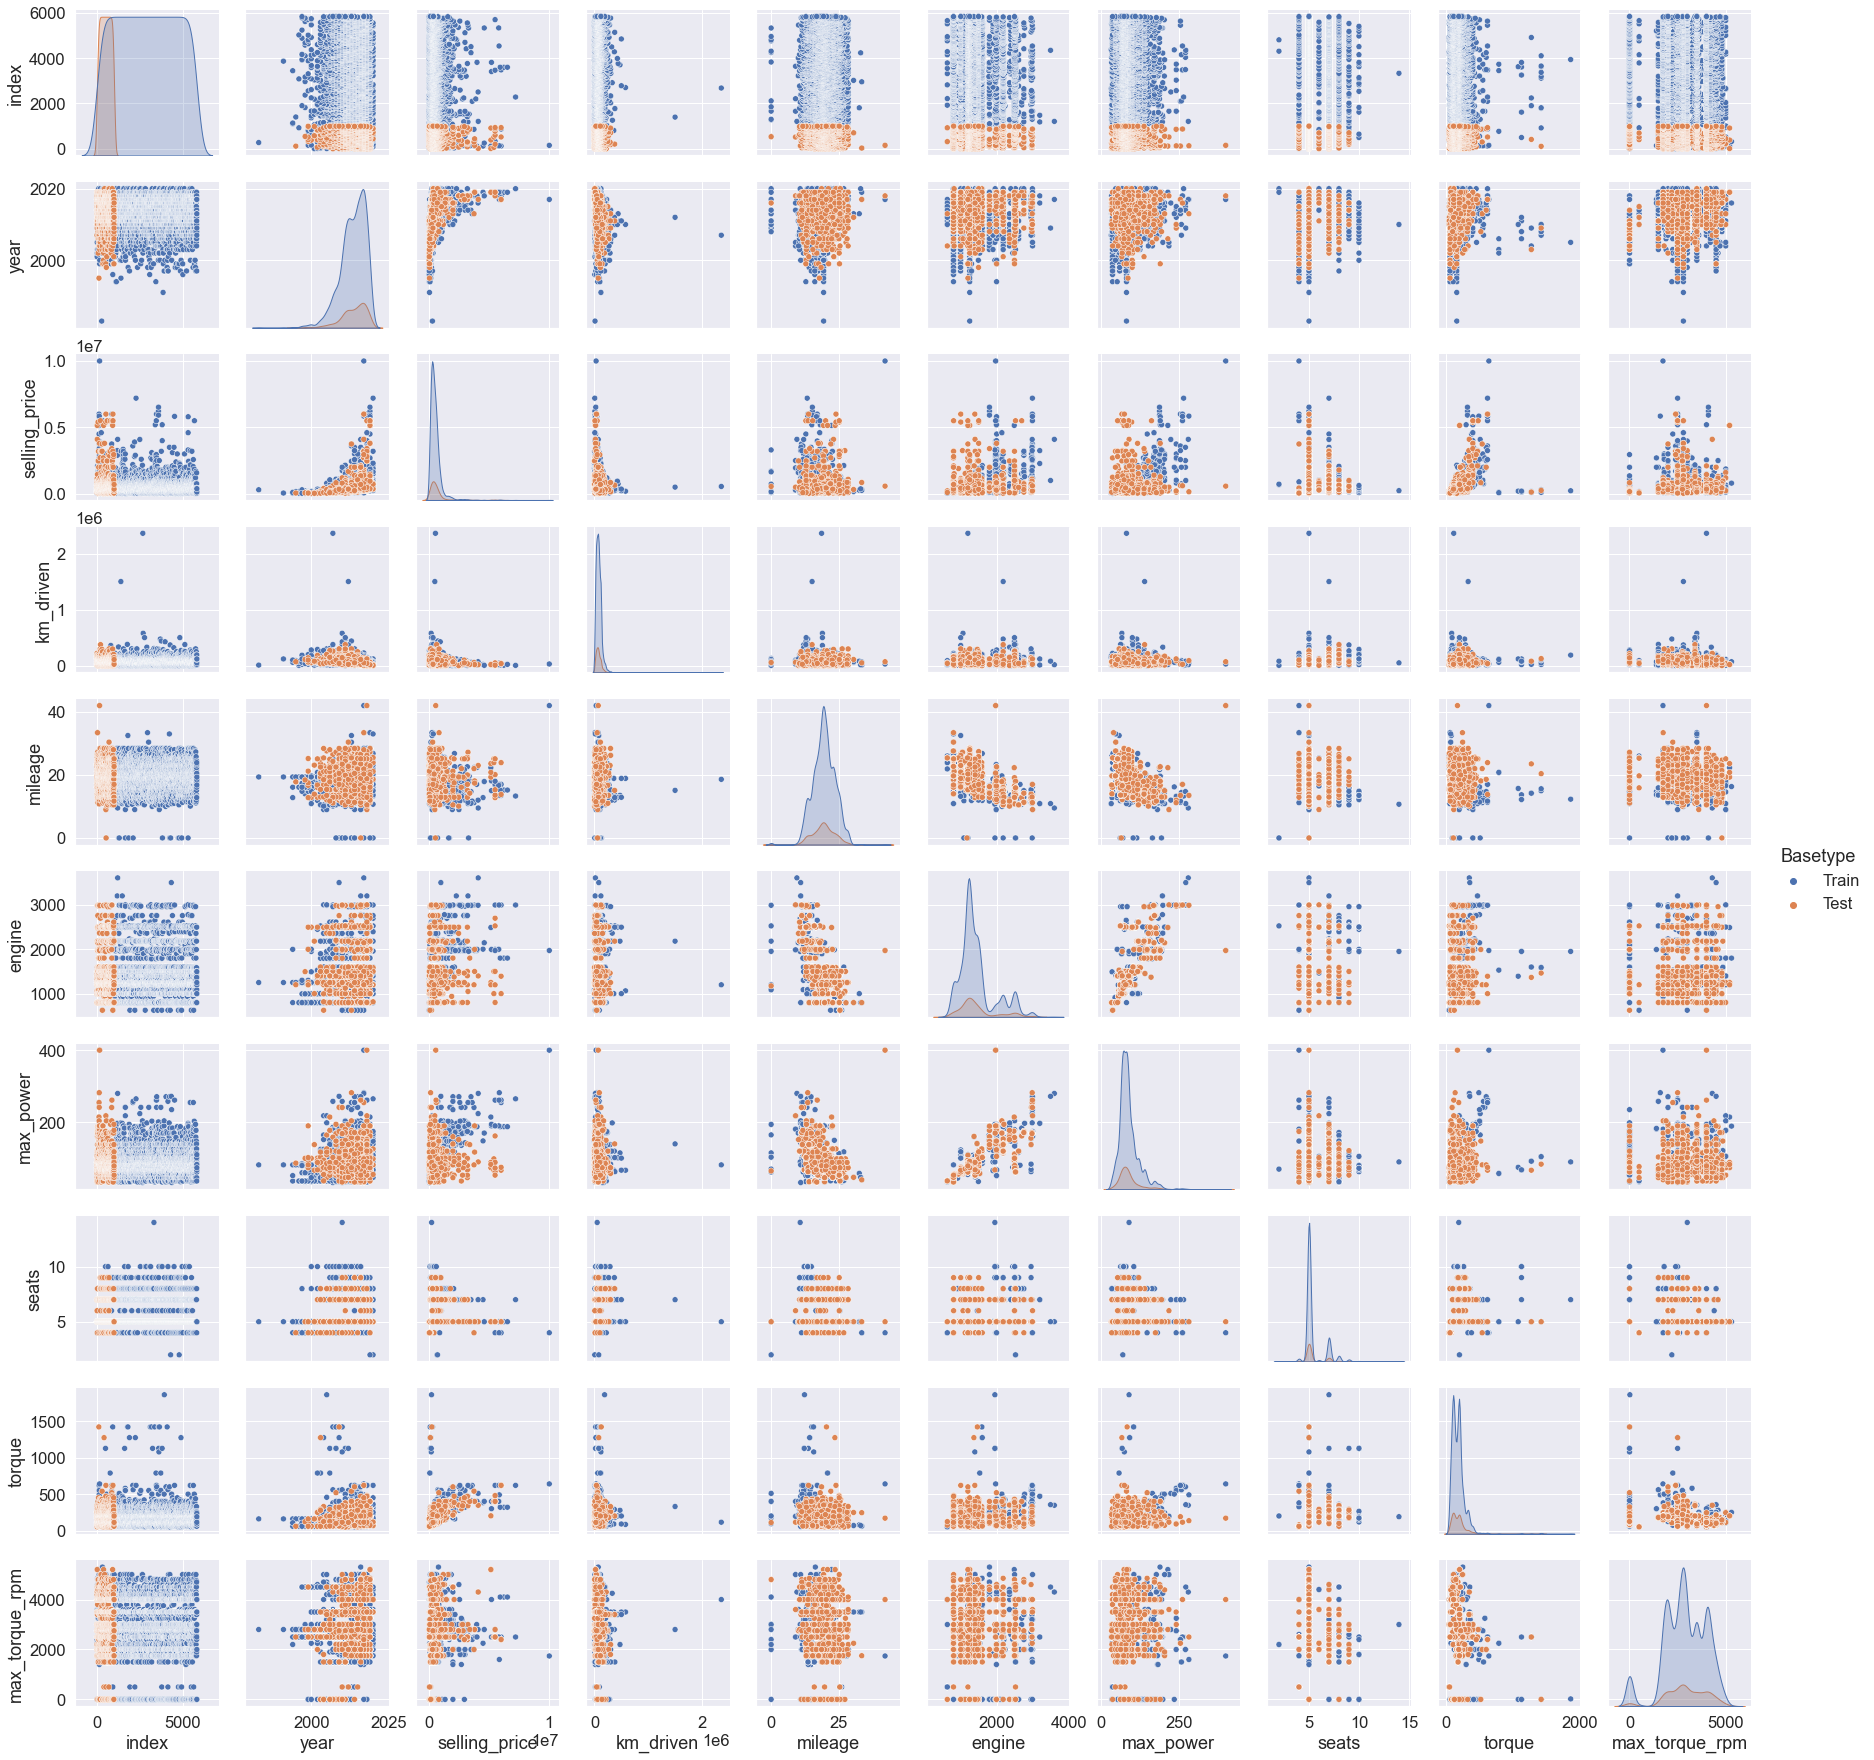

In [257]:
df_train['Basetype'] = 'Train' 
df_test['Basetype'] = 'Test'
df_all = pd.concat([df_train, df_test])
df_all.reset_index(inplace=True)
sns.pairplot(df_all, hue='Basetype');

df_train.drop(['Basetype'], axis=1, inplace = True)
df_test.drop(['Basetype'], axis=1, inplace = True)

### <font color='Purple'> ответ: Да, в целом, кажется, что распределения всех переменных в трейне и в тесте имеют схожую форму и существенно не различаются.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [258]:
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int16
max_power         float64
seats                int8
torque            float64
max_torque_rpm    float64
dtype: object

In [259]:
# Сразу выделю вещественные и категориальные столбцы

numerics = ['int64', 'float64', 'int8', 'int16']
categorial = ['object']
df_train_num = df_train.select_dtypes(numerics)
df_test_num = df_test.select_dtypes(numerics)

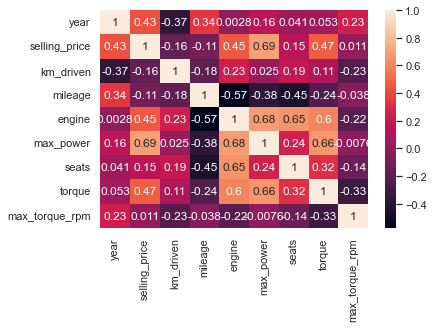

In [260]:
# Построю матрицы корреляций
sns.set(font_scale = 1)
sns.heatmap(df_train_num.corr(), annot=True);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
<font color='Purple'> ответ: Year и Engine имеет самую низкую корреляцию

* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
<font color='Purple'> ответ: selling_price - maxPower, engine - maxpower, engine -  seats, engine -  torque_new, maxpower - torque_new. 

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
<font color='Purple'> ответ: Скорее нет, поскольку корреляция между признаками относительно невысокая + по графику не видно четкой зависимости

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

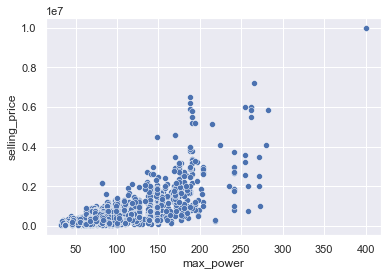

In [261]:
sns.scatterplot(x = df_train['max_power'], y = df_train['selling_price']);

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<AxesSubplot:xlabel='selling_price', ylabel='owner'>

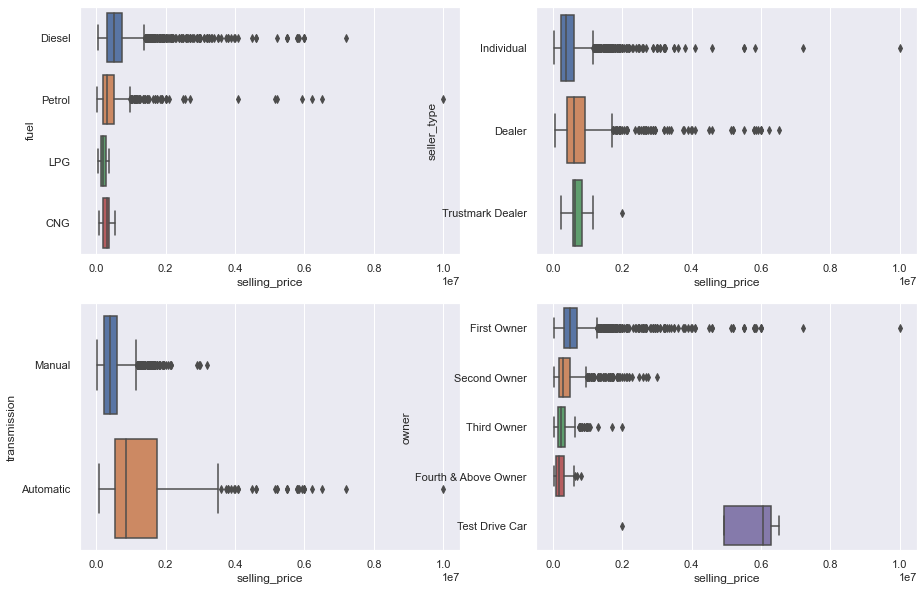

In [262]:
# мне кажется, что полезно дополнительно рассмотреть зависимости от номинальных / порядковых признаков
fig, axes = plt.subplots(2,2, figsize = (15, 10))

sns.boxplot(ax=axes[0][0], x = df_train['selling_price'], y = df_train['fuel'])
sns.boxplot(ax=axes[0][1], x = df_train['selling_price'], y = df_train['seller_type'])
sns.boxplot(ax=axes[1][0], x = df_train['selling_price'], y = df_train['transmission'])
sns.boxplot(ax=axes[1][1], x = df_train['selling_price'], y = df_train['owner'])

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [263]:
y_train = df_train['selling_price']
X_train = df_train_num.drop('selling_price', axis = 1)

In [264]:
assert X_train.shape == (5840, 8) # с учетом предобработанных torque всё хорошо)

In [265]:
y_test = df_test['selling_price']
X_test = df_test_num.drop('selling_price', axis = 1)

In [266]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

LR = LinearRegression()
LR.fit(X_train, y_train)

y_train_predict = LR.predict(X_train)
y_test_predict = LR.predict(X_test)

mse_train = MSE(y_train, y_train_predict)
mse_test = MSE(y_test, y_test_predict)

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print(f'Train\nMSE {mse_train}\nR2 {r2_train}')
print(f'Test\nMSE {mse_test}\nR2 {r2_test}')

Train
MSE 115657619201.7759
R2 0.59650331541704
Test
MSE 633274480891.5605
R2 -0.10167540335257352


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [268]:
from sklearn.preprocessing import StandardScaler

# Инициализирую scaler и обучаю на трейне
scaler = StandardScaler()
scaler.fit(X_train)

# Применяю к тесту и трейну
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# y_train_reshaped = np.array(y_train).reshape(-1,1)
# y_test_reshaped = np.array(y_test).reshape(-1,1)

# y_train_scaled = scaler.fit_transform(y_train_reshaped)
# y_test_scaled = scaler.fit_transform(y_test_reshaped)


# LR.fit(X_train_scaled, y_train_scaled)
# y_train_predict = lr.predict(X_train_scaled)
# y_test_predict = lr.predict(X_test_scaled)

# mse_train = MSE(y_train_scaled, y_train_predict)
# mse_test = MSE(y_test_scaled, y_test_predict)

# r2_train = r2_score(y_train_scaled, y_train_predict)
# r2_test = r2_score(y_test_scaled, y_test_predict)

# обучаю модель линейной регрессии еще раз на стандартизованных признаках
LR.fit(X_train_scaled, y_train)
y_train_predict = LR.predict(X_train_scaled)
y_test_predict = LR.predict(X_test_scaled)

#оцениваю качество
mse_train = MSE(y_train, y_train_predict)
mse_test = MSE(y_test, y_test_predict)

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print(f'Train\nMSE {mse_train}\nR2 {r2_train}')
print(f'Test\nMSE {mse_test}\nR2 {r2_test}')

Train
MSE 115657619201.77577
R2 0.5965033154170405
Test
MSE 633274480891.5582
R2 -0.10167540335256975


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [269]:
for i,k in zip(LR.coef_, X_train.columns):
    print (i,k)

163890.3671245029 year
-46292.74700098578 km_driven
13785.512779075087 mileage
39673.84108177894 engine
325585.4246601995 max_power
-23664.17266567538 seats
7358.794443813727 torque
-32570.321213999134 max_torque_rpm


### <font color='Purple'> ответ: Судя по коэффициентам, max_power оказывает наиболее сильное влияние на стоимость автомобиля

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [270]:
from sklearn.linear_model import Lasso

l1 = Lasso()
l1.fit(X_train_scaled, y_train)

l1_train_pediction = l1.predict(X_train_scaled)
l1_test_pediction = l1.predict(X_test_scaled)

mse_train = MSE(y_train, l1_train_pediction)
mse_test = MSE(y_test, l1_test_pediction)

r2_train = r2_score(y_train, l1_train_pediction)
r2_test = r2_score(y_test, l1_test_pediction)

print(f'Train\nMSE {mse_train}\nR2 {r2_train}')
print(f'Test\nMSE {mse_test}\nR2 {r2_test}')

Train
MSE 115657619211.33896
R2 0.5965033153836773
Test
MSE 633273176757.1039
R2 -0.1016731346161932


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [271]:
for i,k in zip(l1.coef_, X_train.columns):
    print (i,k)

163889.93415370994 year
-46291.61783520417 km_driven
13784.057963193905 mileage
39669.87894658316 engine
325586.05743468937 max_power
-23661.450786200738 seats
7358.702293651927 torque
-32569.505117805955 max_torque_rpm


### нет, не занулила. Видимо, потому что значения весов слишком большие (у таргета высокие значения)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [272]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.arange(0.02,1,0.01),
         'selection' : ('cyclic', 'random'),
         'warm_start' : (True, False)}

gs = GridSearchCV(l1, param_grid=params, scoring='r2')
gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'selection': ('cyclic', 'random'),
                         'warm_start': (True, False)},
             scoring='r2')

In [273]:
print (f'Best result - {gs.best_score_}')
print(f'Best result params - {gs.best_params_}')

Best result - 0.5822844333611075
Best result params - {'alpha': 0.9799999999999999, 'selection': 'random', 'warm_start': False}


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [274]:
n = 1
for i in params:
    n *=len(params[i])
print (f'пришлось обучить {n} модели')

пришлось обучить 392 модели



<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [275]:
best_alpha = gs.best_params_['alpha']
print (f'Лучший коэффициент alpha - {best_alpha}')

Лучший коэффициент alpha - 0.9799999999999999


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [276]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

params = {'alpha': np.arange(0.02,1,0.01),
         'l1_ratio' : np.arange(0.1,1,0.05),
         'warm_start' : (True, False)}

gs = GridSearchCV(elastic, param_grid=params, scoring='r2', cv=10)
gs.fit(X_train_scaled, y_train)

# your code here

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'l1_ratio': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'warm_start': (True, False)},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [277]:
print (f'Параметры лучшей модели {gs.best_params_}')

Параметры лучшей модели {'alpha': 0.8099999999999999, 'l1_ratio': 0.8500000000000002, 'warm_start': True}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [278]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

In [279]:
assert X_train_cat.shape == (5840, 12)

In [280]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [281]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# Выделю еще раз категориальные столбцы и добавлю к ним seats
cat_cols = list(X_train_cat.describe(include='object').columns)
cat_cols.append('seats')

# сделаю OHE
X_train_ohe = pd.get_dummies(data=X_train_cat, columns=cat_cols, drop_first=True)
X_test_ohe = pd.get_dummies(data=X_test_cat, columns=cat_cols, drop_first=True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [282]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': np.arange(0.02,1,0.01)}

gs = GridSearchCV(ridge, param_grid=params, scoring='r2', cv=10)
gs.fit(X_train_ohe, y_train)
gs.best_score_

0.6207417519142038

<font color='#FF6600'>Да, качество предсказаний стало лучше</font>

In [283]:
# Но теперь же надо проверить и на тесте

X_test_ohe['seats_4'] = 0
X_test_ohe['seats_10'] = 0
X_test_ohe['seats_14'] = 0
X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns)
ridge_test_prediction = gs.predict(X_test_ohe)
ridge_train_prediction = gs.predict(X_train_ohe)

mse_train = MSE(y_train, ridge_train_prediction)
r2_train = r2_score(y_train, ridge_train_prediction)

mse_test = MSE(y_test, ridge_test_prediction)
r2_test = r2_score(y_test, ridge_test_prediction)

print(f'Test\nMSE {mse_train}\nR2 {r2_train}')
print(f'Test\nMSE {mse_test}\nR2 {r2_test}')


Test
MSE 94970439788.20816
R2 0.6686750267522434
Test
MSE 516629053011.9759
R2 0.10124671444310573


In [284]:
numcols = X_train_ohe.select_dtypes(numerics).columns
df_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe.select_dtypes(numerics)))
df_train_scaled.set_axis([numcols], axis=1, inplace=True)
X_train_cat_scaled = pd.concat([df_train_scaled, X_train_ohe[X_train_ohe.columns[7:]]], axis=1)
X_train_cat_scaled = X_train_cat_scaled.set_axis([str(col).strip('\'\)\(\,') for col in X_train_cat_scaled.columns], axis=1)

gs.fit(X_train_cat_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='r2')

In [285]:
gs.best_score_

0.6207618464245966

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [286]:
# Поскольку предобработку уже частично делал, то решил заново загрузить базы, чтобы работать с чистой базой. 

df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')


In [287]:
# найдем и удалим дубликаты
duples = df_train[df_train.duplicated(subset = df_train.drop(['selling_price'], axis=1).columns, keep='first') == True]
df_train.drop(duples.index, inplace = True)

# сбросим индекс
df_train.reset_index(inplace=True)

# убьем индекс колонку
df_train.drop('index', axis=1, inplace=True)

# почистим фичи от гадостей
df_train['mileage'] = df_train['mileage'].apply(lambda x : cleaning(x))
df_train['engine'] = df_train['engine'].apply(lambda x : cleaning(x))
df_train['max_power'] = df_train['max_power'].apply(lambda x : cleaning(x))
df_test['mileage'] = df_train['mileage'].apply(lambda x : cleaning(x))
df_test['engine'] = df_train['engine'].apply(lambda x : cleaning(x))
df_test['max_power'] = df_train['max_power'].apply(lambda x : cleaning(x))

# поработаем со столбцом torque
df_train['torque_new'] = df_train['torque'].apply(lambda x: torque_dp(x)[0])
df_train['torque_max'] = df_train['torque'].apply(lambda x: torque_dp(x)[1])
df_train['torque_new'] = pd.to_numeric(df_train['torque_new'])
df_train['torque_max'] = pd.to_numeric(df_train['torque_max'])
df_test['torque_new'] = df_test['torque'].apply(lambda x: torque_dp(x)[0])
df_test['torque_max'] = df_test['torque'].apply(lambda x: torque_dp(x)[1])
df_test['torque_new'] = pd.to_numeric(df_test['torque_new'])
df_test['torque_max'] = pd.to_numeric(df_test['torque_max'])
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)
df_train.rename(columns={'torque_new' : 'torque', 'torque_max' : 'max_torque_rpm'}, inplace= True)
df_test.rename(columns={'torque_new' : 'torque', 'torque_max' : 'max_torque_rpm'}, inplace= True)

In [288]:
# Попробую заполнить пропуски с помощью MICE 
# (хотя не хватило времени разобраться, как mice из коробки работает с категориальными фичами в качестве предикторов)

from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor(n_neighbors=20)
imputer = IterativeImputer(estimator=KNN_reg,random_state=42)

df_train_impKNN = imputer.fit_transform(df_train.select_dtypes(numerics).drop('selling_price', axis=1))
df_test_impKNN = imputer.transform(df_test.select_dtypes(numerics).drop('selling_price', axis=1)) 

In [289]:
df_train_impKNN = pd.DataFrame(df_train_impKNN, 
                               columns=df_train.select_dtypes(numerics).drop('selling_price', axis=1).columns)
df_test_impKNN = pd.DataFrame(df_test_impKNN, 
                              columns=df_test.select_dtypes(numerics).drop('selling_price', axis=1).columns)

df_train_cat = df_train.select_dtypes(categorial)
df_test_cat = df_test.select_dtypes(categorial)

df_train = pd.concat([df_train_impKNN, df_train_cat, df_train['selling_price']], axis=1)
df_test = pd.concat([df_test_impKNN, df_test_cat, df_test['selling_price']], axis=1)

df_train['seats'] = df_train['seats'].round(0)
df_test['seats'] = df_test['seats'].round(0)

Text(0.5, 1.0, 'max_torque')

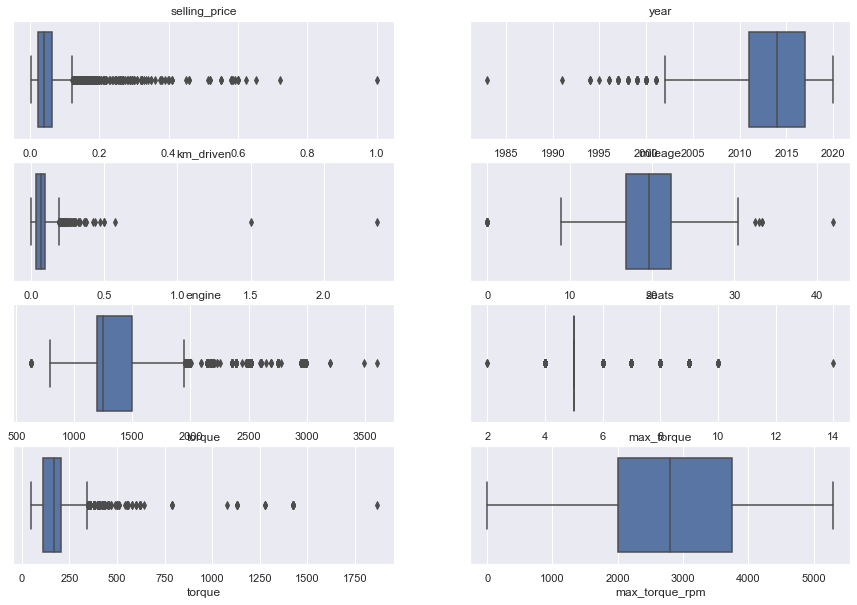

In [290]:
# Поработаем с выбросами

fig, axes = plt.subplots(4,2, figsize = (15, 10));

sns.boxplot(data = df_train, x = 'selling_price', ax = axes[0][0]);
sns.boxplot(data = df_train, x = 'year', ax = axes[0][1]);
sns.boxplot(data = df_train, x = 'km_driven', ax = axes[1][0]);
sns.boxplot(data = df_train, x = 'mileage', ax = axes[1][1]);
sns.boxplot(data = df_train, x = 'engine', ax = axes[2][0]);
sns.boxplot(data = df_train, x = 'seats', ax = axes[2][1]);
sns.boxplot(data = df_train, x = 'torque', ax = axes[3][0]);
sns.boxplot(data = df_train, x = 'max_torque_rpm', ax = axes[3][1]);

axes[0, 0].set_title('selling_price')
axes[0, 1].set_title('year')
axes[1, 0].set_title('km_driven')
axes[1, 1].set_title('mileage')
axes[2, 0].set_title('engine')
axes[2, 1].set_title('seats')
axes[3, 0].set_title('torque')
axes[3, 1].set_title('max_torque')

In [291]:
# Видим, что у многих переменных есть выбросы, включая таргет. 
# Попробуем определить выбросы с помощью интерквартильного размаха и заменить их значением персентиля соответственно.

# создадим функцию для обрезки по персентилям
def remove_oultiers (df, col, perc_lower, perc_upper):
    lower_percentile = np.percentile(df[col], perc_lower)
    upper_percentile = np.percentile(df[col], perc_upper)
    df[col] = np.where(df[col] > upper_percentile, upper_percentile, df[col])
    df[col] = np.where(df[col] < lower_percentile, lower_percentile, df[col])
    
remove_oultiers(df_train, 'selling_price', 0, 98)
remove_oultiers(df_train, 'km_driven', 0, 97)
remove_oultiers(df_train, 'year', 2, 100)
remove_oultiers(df_train, 'engine', 2, 97)
remove_oultiers(df_train, 'mileage', 2, 98)
remove_oultiers(df_train, 'torque', 0, 97)


Text(0.5, 1.0, 'max_torque')

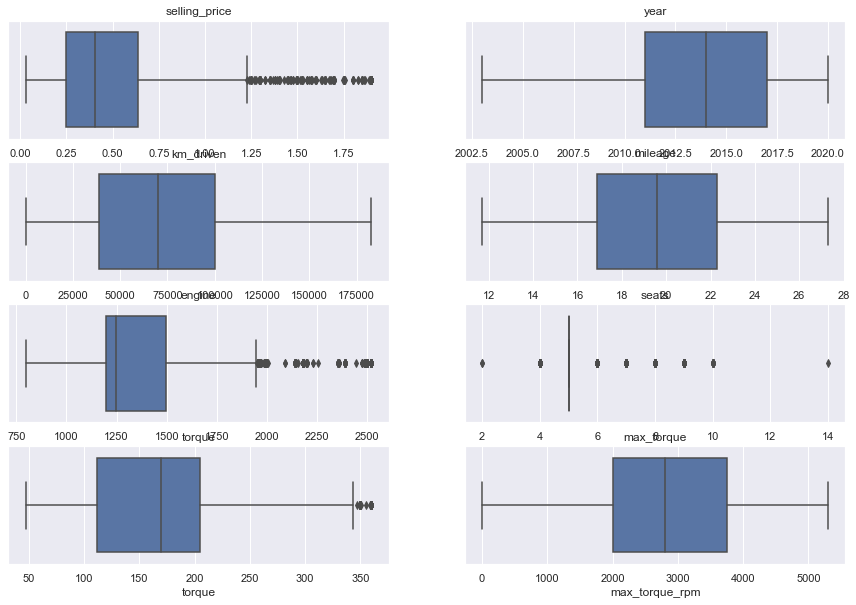

In [292]:
# посмотрим еще раз на box plots. Видим, что частично удалось убрать выбросы. Кое-где остались, но сильно резать тоже нехорошо

fig, axes = plt.subplots(4,2, figsize = (15, 10));

sns.boxplot(data = df_train, x = 'selling_price', ax = axes[0][0]);
sns.boxplot(data = df_train, x = 'year', ax = axes[0][1]);
sns.boxplot(data = df_train, x = 'km_driven', ax = axes[1][0]);
sns.boxplot(data = df_train, x = 'mileage', ax = axes[1][1]);
sns.boxplot(data = df_train, x = 'engine', ax = axes[2][0]);
sns.boxplot(data = df_train, x = 'seats', ax = axes[2][1]);
sns.boxplot(data = df_train, x = 'torque', ax = axes[3][0]);
sns.boxplot(data = df_train, x = 'max_torque_rpm', ax = axes[3][1]);

axes[0, 0].set_title('selling_price')
axes[0, 1].set_title('year')
axes[1, 0].set_title('km_driven')
axes[1, 1].set_title('mileage')
axes[2, 0].set_title('engine')
axes[2, 1].set_title('seats')
axes[3, 0].set_title('torque')
axes[3, 1].set_title('max_torque')

In [293]:
# Вытащим сочетание марки - бренда
df_train['brand'] = df_train['name'].apply(lambda x: re.search(r'\w+', x)[0])
df_train['brand_model'] = df_train['name'].apply(lambda x: re.search(r'\w+\s*\w+', x)[0])
df_test['brand'] = df_test['name'].apply(lambda x: re.search(r'\w+', x)[0])
df_test['brand_model'] = df_test['name'].apply(lambda x: re.search(r'\w+\s*\w+', x)[0])

# удалим name, большу оттуда пока ничего доставать не стал
df_train.drop('name', axis=1, inplace=True)
df_test.drop('name', axis=1, inplace=True)

In [294]:
# Забинаризуем переменную owner, объединим категории

print (df_train['owner'].value_counts())

def binarize_owner (x) : 
    if x in ['First Owner', 'Second Owner']:
        return x
    elif x in ['Third Owner', 'Fourth & Above Owner']:
        return 'Third & Above Owner'
    elif x == 'Test Drive Car':
        return 'First Owner'

df_train['owner_binarized'] = df_train['owner'].apply(lambda x : binarize_owner(x))
df_test['owner_binarized'] = df_test['owner'].apply(lambda x : binarize_owner(x))
df_train['owner_binarized'].value_counts()

First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above Owner     140
Test Drive Car             4
Name: owner, dtype: int64


First Owner            3607
Second Owner           1639
Third & Above Owner     594
Name: owner_binarized, dtype: int64

In [295]:
# То же самое проделаем с seats
print(df_train['seats'].value_counts())

def binarize_seats (x): 
    if x < 5:
        return 'less than 5'
    if x == 5 :
        return '5'
    if x == 6 or x == 7:
        return '6-7'
    elif x > 7:
        return 'more than 7'
    else:
        print(f'wow{x}')
        
df_train['seats'] = df_train['seats'].apply(lambda x: binarize_seats(x))
df_test['seats'] = df_test['seats'].apply(lambda x: binarize_seats(x))

5.0     4575
7.0      803
8.0      191
4.0       94
6.0       88
9.0       68
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64


In [296]:
# Создадим новые вещественные фичи (решил только те, что советуют сделать в описпнии к заданию, 
# а то можно много как переобучиться, а времени нет)

df_train['year_x2'] = df_train['year']**2
df_train['km_driven_x2'] = df_train['km_driven']**2
df_train['power_by_litr'] = df_train['max_power'] / df_train['engine']
df_test['year_x2'] = df_test['year']**2
df_test['km_driven_x2'] = df_test['km_driven']**2
df_test['power_by_litr'] = df_test['max_power'] / df_train['engine']

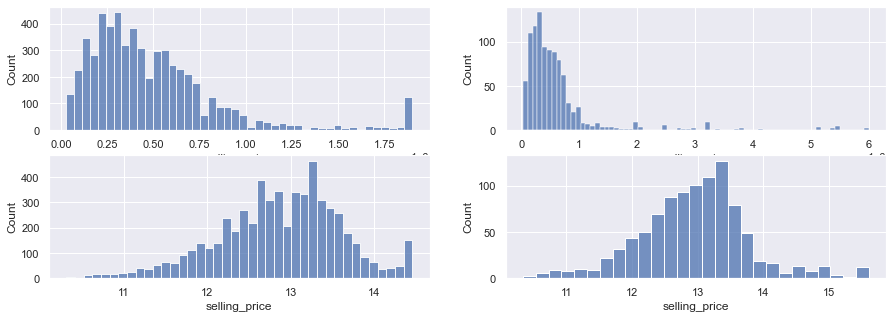

In [297]:
# посмотрим на таргет

fig, axes = plt.subplots(2,2, figsize = (15, 5))

sns.histplot(df_train['selling_price'], ax = axes[0][0]);
sns.histplot(df_test['selling_price'], ax = axes[0][1]);

# Видим, что распределение логнормальное. Давайте приведем его к нормальному виду, может будет лучше?
sns.histplot(np.log(df_train['selling_price']), ax = axes[1][0]);
sns.histplot(np.log(df_test['selling_price']), ax = axes[1][1]);

# Вроде как стало лучше и вроде бы это должно помогать линейным моделям (не помню почему)
df_train['selling_price'] = np.log(df_train['selling_price'])
df_test['selling_price'] = np.log(df_test['selling_price'])

In [298]:
# теперь уберу все ненужные переменные
df_train.drop('owner', inplace=True, axis=1)
df_train.drop('brand_model', inplace=True, axis=1)
df_test.drop('owner', inplace=True, axis = 1)
df_test.drop('brand_model', inplace=True, axis=1)

In [299]:
categorial = ['object']

# выделяю иксы и таргеты для модели
X_train = df_train.drop('selling_price', axis=1)
X_test = df_test.drop('selling_price', axis=1)
y_train = df_train['selling_price']
y_test = df_test['selling_price']

# стандартизую вещественные признаки
num_cols = X_train.select_dtypes(numerics).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# запускаю one_hot_encoding
cat_cols = X_train.select_dtypes(categorial).columns
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)

In [300]:
#сохраняю scaler для inference FastApi. Сорри, что через joblib - хотел попробовать
import joblib

scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']

In [301]:
# делаю проверку столбцов в train и test и дописываю их при необходимости

for i in X_train.columns:
    if i not in X_test.columns: 
        X_test[i] = 0
for i in X_test.columns:
    if i not in X_train.columns: 
#         X_test['other'] = 1
        X_test.drop(i, axis=1, inplace=True)
    
# делаю проверку, что нет никаких столбцов из трейна, которых нет в тесте и наоборот
for i in X_train.columns:
    if i not in X_test.columns: 
        print(i)       
for i in X_test.columns:
    if i not in X_train.columns: 
        print(i)

# привожу в соответствие test и train
X_test = X_test.reindex(columns=X_train.columns)

In [302]:
# инициализирую модель ElasticNet

from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

params = {'alpha': np.arange(0.02,1,0.05),
         'l1_ratio' : np.arange(0.1,1,0.05),
         'warm_start' : (True, False)}

gs = GridSearchCV(elastic, param_grid=params, scoring='r2')
gs.fit(X_train, y_train)
train_pred = gs.predict(X_train)
test_pred = gs.predict(X_test)

# проверяю качество
mse_train = MSE(y_train, train_pred)
r2_train = r2_score(y_train, train_pred)

mse_test = MSE(y_test, test_pred)
r2_test = r2_score(y_test, test_pred)

print(f'Test\nMSE {mse_train}\nR2 {r2_train}')
print(f'Test\nMSE {mse_test}\nR2 {r2_test}')

Test
MSE 0.06769379852366783
R2 0.8765174244411262
Test
MSE 0.3534696394756049
R2 0.5058491518535027


In [303]:
# инициализирую модель Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': np.arange(0.02,1,0.01)}

gs = GridSearchCV(ridge, param_grid=params, scoring='r2')
gs.fit(X_train, y_train)
train_pred = gs.predict(X_train)
test_pred = gs.predict(X_test)

# проверяю качество
mse_train = MSE(y_train, train_pred)
r2_train = r2_score(y_train, train_pred)

mse_test = MSE(y_test, test_pred)
r2_test = r2_score(y_test, test_pred)

print(f'Train\nMSE {mse_train}\nR2 {r2_train}')
print(f'Test\nMSE {mse_test}\nR2 {r2_test}')

Train
MSE 0.06146518515730716
R2 0.8878792513353541
Test
MSE 0.2921691084471712
R2 0.5915473448990805


In [304]:
import pickle

# сохраним модель
model = gs.best_estimator_
pickle.dump(model, open('model.pkl', 'wb'))

# сохраним обработку пропусков также
pickle.dump(imputer, open('imputer.pkl', 'wb'))


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [305]:
def business_metrics(y_true, y_pred):
    y_pred = np.exp(np.array(y_pred))
    y_true = np.exp(np.array(y_true))
    diff = abs(y_true - y_pred) / y_true
    return np.mean (diff < 0.1)

business_metrics(y_test, test_pred)

0.164

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [306]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link